# Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

# read the data
df = pd.read_csv('crop_data.csv')

# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(499, 16)
No                     int64
crop_type             object
soil_type             object
month                float64
seed_rate            float64
fertilizer_type       object
fertilizer_amt       float64
o_fertilizer_type     object
o_fertilizer_amt     float64
manure_type           object
manure_amt           float64
insecticide_amt      float64
herbicide_amt          int64
address               object
temp                 float64
rate                   int64
dtype: object
['No' 'month' 'seed_rate' 'fertilizer_amt' 'o_fertilizer_amt' 'manure_amt'
 'insecticide_amt' 'herbicide_amt' 'temp' 'rate']
['crop_type' 'soil_type' 'fertilizer_type' 'o_fertilizer_type'
 'manure_type' 'address']


In [5]:
pd.set_option('display.max_rows',df.shape[0]+1)
pd.set_option('display.max_columns',df.shape[0]+1)

In [6]:
df

,No,crop_type,soil_type,month,seed_rate,fertilizer_type,fertilizer_amt,o_fertilizer_type,o_fertilizer_amt,manure_type,manure_amt,insecticide_amt,herbicide_amt,address,temp,rate
0,1,rainy paddy,ferriasol,6.0,35.0,NPK,100.0,compound,50.0,feces,15.0,60.0,90,Bago,27.0,80
1,2,rainy paddy,ferriasol,6.0,36.0,NPK,120.0,Compound,50.0,feces,15.0,60.0,90,Bago,27.0,80
2,3,rainy paddy,ferriasol,6.0,35.0,NPK,150.0,Compound,50.0,feces,15.0,60.0,90,Bago,27.0,85
3,4,rainy paddy,ferriasol,6.0,38.0,NPK,150.0,Compound,50.0,feces,15.0,60.0,90,Bago,27.0,85
4,5,rainy paddy,ferriasol,6.0,40.0,NPK,100.0,Compound,50.0,feces,15.0,60.0,90,Bago,27.0,85
5,6,rainy paddy,ferriasol,6.0,45.0,NPK,100.0,Compound,50.0,feces,NaN,44.0,90,Bago,27.0,85
6,7,rainy paddy,ferriasol,6.0,40.0,NPK,100.0,Compound,50.0,Feces,NaN,44.0,90,Bago,25.0,90
7,8,rainy paddy,ferriasol,6.0,45.0,NPK,150.0,COMPOUND,50.0,Feces,15.0,44.0,90,Bago,25.0,90
8,9,rainy paddy,ferriasol,6.0,45.0,NPK,150.0,COMPOUND,50.0,fEces,15.0,44.0,60,Bago,25.0,90
9,10,rainy paddy,ferriasol,6.0,45.0,NPK,120.0,COMPOUND,50.0,F eces,15.0,44.0,60,Bago,25.0,80


# Missing Data Shown in Percentage List

In [8]:
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

No - 0.0%
crop_type - 0.0%
soil_type - 0.0%
month - 1.0%
seed_rate - 0.0%
fertilizer_type - 5.0%
fertilizer_amt - 1.0%
o_fertilizer_type - 0.0%
o_fertilizer_amt - 4.0%
manure_type - 8.0%
manure_amt - 11.0%
insecticide_amt - 0.0%
herbicide_amt - 0.0%
address - 0.0%
temp - 5.0%
rate - 0.0%


# Impute the Missing (Numerical)

In [9]:
# impute the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median() #median imputation
        df[col] = df[col].fillna(med)

imputing missing values for: month
imputing missing values for: seed_rate
imputing missing values for: fertilizer_amt
imputing missing values for: o_fertilizer_amt
imputing missing values for: manure_amt
imputing missing values for: temp


# Impute the Missing Value (Categorical)

In [10]:
# impute the missing values and create the missing value indicator variables for each non-numeric column.
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

imputing missing values for: fertilizer_type
imputing missing values for: manure_type


In [10]:
df

,No,crop_type,soil_type,month,seed_rate,fertilizer_type,fertilizer_amt,o_fertilizer_type,o_fertilizer_amt,manure_type,manure_amt,insecticide_amt,herbicide_amt,address,temp,rate,No_ismissing,month_ismissing,seed_rate_ismissing,fertilizer_amt_ismissing,o_fertilizer_amt_ismissing,manure_amt_ismissing,insecticide_amt_ismissing,herbicide_amt_ismissing,temp_ismissing,rate_ismissing,crop_type_ismissing,soil_type_ismissing,fertilizer_type_ismissing,o_fertilizer_type_ismissing,manure_type_ismissing,address_ismissing
0,1.0,rainy paddy,ferriasol,6.0,35.0,NPK,100.0,compound,50.0,feces,15.0,60.0,90.0,Bago,27.0,80.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2.0,rainy paddy,ferriasol,6.0,36.0,NPK,120.0,Compound,50.0,feces,15.0,60.0,90.0,Bago,27.0,80.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3.0,rainy paddy,ferriasol,6.0,35.0,NPK,150.0,Compound,50.0,feces,15.0,60.0,90.0,Bago,27.0,85.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4.0,rainy paddy,ferriasol,6.0,38.0,NPK,150.0,Compound,50.0,feces,15.0,60.0,90.0,Bago,27.0,85.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5.0,rainy paddy,ferriasol,6.0,40.0,NPK,100.0,Compound,50.0,feces,15.0,60.0,90.0,Bago,27.0,85.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,6.0,rainy paddy,ferriasol,6.0,45.0,NPK,100.0,Compound,50.0,feces,1.0,44.0,90.0,Bago,27.0,85.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
6,7.0,rainy paddy,ferriasol,6.0,40.0,NPK,100.0,Compound,50.0,Feces,1.0,44.0,90.0,Bago,25.0,90.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
7,8.0,rainy paddy,ferriasol,6.0,45.0,NPK,150.0,COMPOUND,50.0,Feces,15.0,44.0,90.0,Bago,25.0,90.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,9.0,rainy paddy,ferriasol,6.0,45.0,NPK,150.0,COMPOUND,50.0,fEces,15.0,44.0,60.0,Bago,25.0,90.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,10.0,rainy paddy,ferriasol,6.0,45.0,NPK,120.0,COMPOUND,50.0,F eces,15.0,44.0,60.0,Bago,25.0,80.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Irregular Data (Outlier)

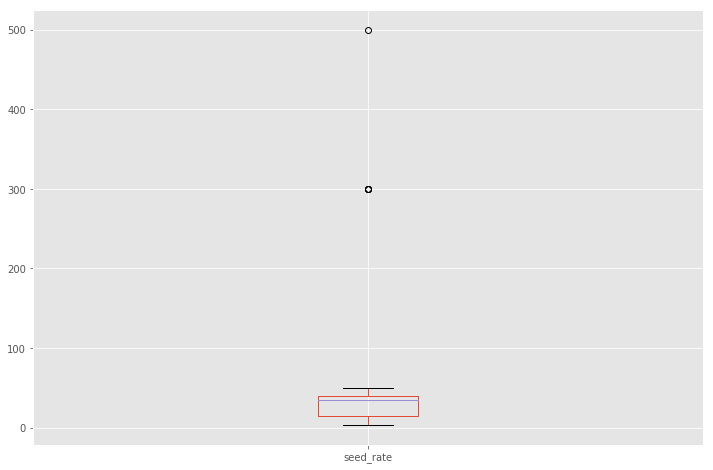

In [12]:
df.boxplot(column=['seed_rate']) # Display the outlie of seed_rate


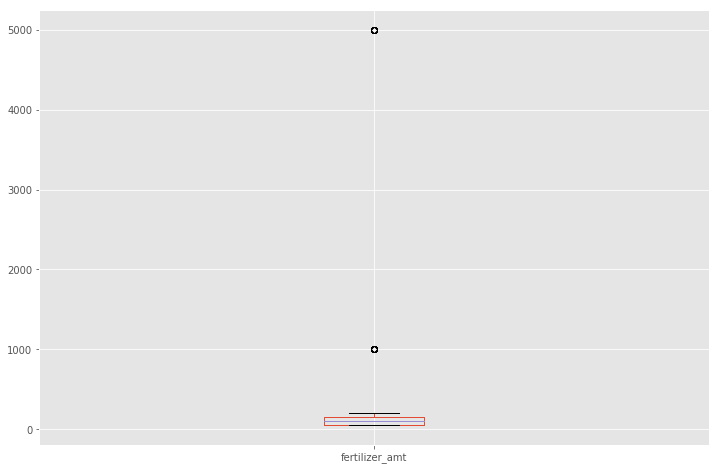

In [13]:
df.boxplot(column=['fertilizer_amt'])


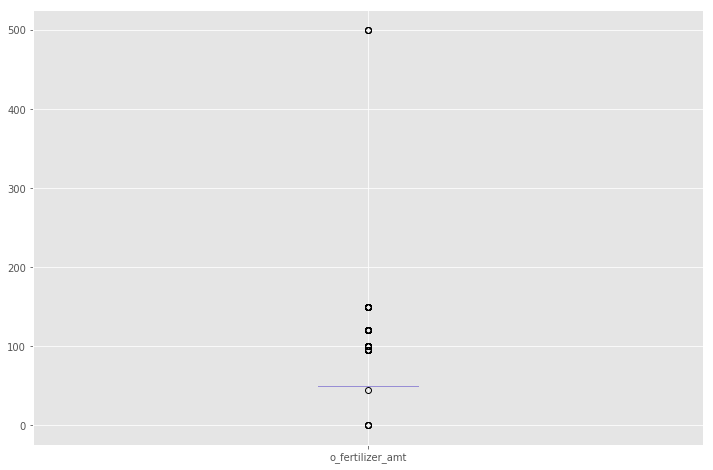

In [14]:
df.boxplot(column=['o_fertilizer_amt'])


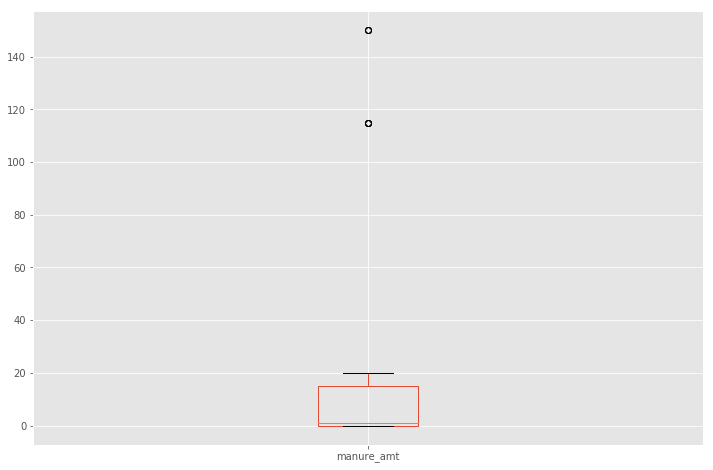

In [15]:
df.boxplot(column=['manure_amt'])


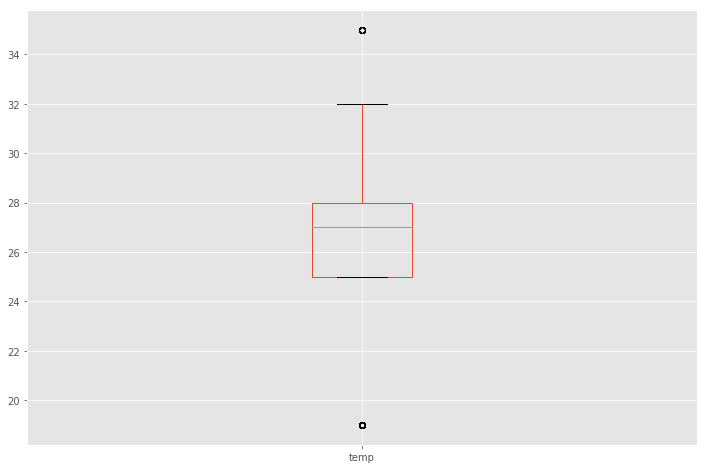

In [16]:
df.boxplot(column=['temp'])

# Finding Out Unnecessary Data (Uninformative)

In [17]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

month_ismissing: 99.19840%
False    495
True       4
Name: month_ismissing, dtype: int64

seed_rate_ismissing: 99.79960%
False    498
True       1
Name: seed_rate_ismissing, dtype: int64

fertilizer_amt_ismissing: 99.39880%
False    496
True       3
Name: fertilizer_amt_ismissing, dtype: int64

o_fertilizer_amt_ismissing: 96.19238%
False    480
True      19
Name: o_fertilizer_amt_ismissing, dtype: int64



In [38]:
# eliminate the duplicated rows
# drop the unique col "No" & duplicated rows
df_dedupped = df.drop('No', axis=1).drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)


(499, 24)
(181, 23)


# Counting the value in each coloumn

In [39]:
# Count the value ot the column ('crop_type')
df_dedupped['crop_type'].value_counts(dropna=False) 

Bago          100
Ayeyarwady     35
Shan           26
Mandalay       20
Name: address, dtype: int64

In [40]:
# Count the value ot the column ('address')
df_dedupped['address'].value_counts(dropna=False)

Bago          100
Ayeyarwady     35
Shan           26
Mandalay       20
Name: address, dtype: int64

In [ ]:
# Count the value ot the column ('manure_type')
df_dedupped['manure_type'].value_counts(dropna=False)

In [ ]:
# Count the value ot the column ('o_fertilizer_type')
df_dedupped['o_fertilizer_type'].value_counts(dropna=False)

In [ ]:
# Count the value ot the column ('fertilizer_type')
df_dedupped['fertilizer_type'].value_counts(dropna=False)

In [41]:
# Count the value ot the column (soil_type')
df_dedupped['soil_type'].value_counts(dropna=False)

ferriasol     100
fluvisols      24
vertisols      20
Acrisols       15
acrisol         9
Fluvisols       7
F luvisols      4
a crisol        2
Name: soil_type, dtype: int64

# Change Lower Case 

In [43]:
# make everything lower case.
df_dedupped['crop_type'] = df_dedupped['crop_type'].str.lower()
df_dedupped['crop_type'].value_counts(dropna=False)

rainy paddy     85
summer paddy    50
maize           46
Name: crop_type, dtype: int64

In [44]:
df_dedupped['soil_type'] = df_dedupped['soil_type'].str.lower()
df_dedupped['soil_type'].value_counts(dropna=False)

ferriasol     100
fluvisols      31
vertisols      20
acrisols       15
acrisol         9
f luvisols      4
a crisol        2
Name: soil_type, dtype: int64

In [45]:
df_dedupped['fertilizer_type'] = df_dedupped['fertilizer_type'].str.lower()
df_dedupped['fertilizer_type'].value_counts(dropna=False)

npk         149
urea         20
compound     12
Name: fertilizer_type, dtype: int64

In [28]:
df_dedupped['o_fertilizer_type'] = df_dedupped['o_fertilizer_type'].str.lower()
df_dedupped['o_fertilizer_type'].value_counts(dropna=False)

compound     74
cmpd         15
urea         13
npk           9
urea          7
u rea         6
compund       5
c ompound     4
compoun d     2
Name: o_fertilizer_type, dtype: int64

In [46]:
df_dedupped['manure_type'] = df_dedupped['manure_type'].str.lower()
df_dedupped['manure_type'].value_counts(dropna=False)

feces          99
biocomposer    40
greenmanure    14
nth            14
nothing        12
f eces          2
Name: manure_type, dtype: int64

In [47]:
df_dedupped['address'] = df_dedupped['address'].str.lower()
df_dedupped['address'].value_counts(dropna=False)

bago          100
ayeyarwady     35
shan           26
mandalay       20
Name: address, dtype: int64

# Make Categorical Data Consistent (Soil_Type) 

In [100]:
import fuzzywuzzy
from fuzzywuzzy import process

# get all the unique values in the 'soil_type' column
soil = df_dedupped['soil_type'].unique()
print(soil)

['ferriasol' 'fluvisol' 'vertisols' 'acrisol']


In [97]:
matches_soil_acrisol = fuzzywuzzy.process.extract("acrisol", soil, limit=100, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches_soil_acrisol # To know in which ratio the value similar with the acrisol (correct one) 

[('acrisol', 100), ('ferriasol', 62), ('vertisols', 62), ('fluvisol', 53)]

In [95]:
matches_soil_fluvisol = fuzzywuzzy.process.extract("fluvisol", soil, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches_soil_fluvisol # To know in which ratio the value similar with the fluvisol (correct one)

[('fluvisol', 100), ('ferriasol', 59), ('vertisols', 59), ('acrisol', 53)]

In [79]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 20 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=20, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > min_ratio
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print(strings)
    print("All done!")

In [89]:
replace_matches_in_column(df=df_dedupped, column='soil_type', string_to_match="acrisol", min_ratio=85)
 # Call the function for 'acrisol'
replace_matches_in_column(df=df_dedupped, column='soil_type', string_to_match="fluvisol", min_ratio=85)

All done!
All done!


In [82]:
df_dedupped

,crop_type,soil_type,month,seed_rate,fertilizer_type,fertilizer_amt,o_fertilizer_type,o_fertilizer_amt,manure_type,manure_amt,insecticide_amt,herbicide_amt,address,temp,rate,month_ismissing,seed_rate_ismissing,fertilizer_amt_ismissing,o_fertilizer_amt_ismissing,manure_amt_ismissing,temp_ismissing,fertilizer_type_ismissing,manure_type_ismissing
0,rainy paddy,ferriasol,6.0,35.0,npk,100.0,compound,50.0,feces,15.0,60.0,90,bago,27.0,80,False,False,False,False,False,False,False,False
1,rainy paddy,ferriasol,6.0,36.0,npk,120.0,compound,50.0,feces,15.0,60.0,90,bago,27.0,80,False,False,False,False,False,False,False,False
2,rainy paddy,ferriasol,6.0,35.0,npk,150.0,compound,50.0,feces,15.0,60.0,90,bago,27.0,85,False,False,False,False,False,False,False,False
3,rainy paddy,ferriasol,6.0,38.0,npk,150.0,compound,50.0,feces,15.0,60.0,90,bago,27.0,85,False,False,False,False,False,False,False,False
4,rainy paddy,ferriasol,6.0,40.0,npk,100.0,compound,50.0,feces,15.0,60.0,90,bago,27.0,85,False,False,False,False,False,False,False,False
5,rainy paddy,ferriasol,6.0,45.0,npk,100.0,compound,50.0,feces,1.0,44.0,90,bago,27.0,85,False,False,False,False,True,False,False,False
6,rainy paddy,ferriasol,6.0,40.0,npk,100.0,compound,50.0,feces,1.0,44.0,90,bago,25.0,90,False,False,False,False,True,False,False,False
7,rainy paddy,ferriasol,6.0,45.0,npk,150.0,compound,50.0,feces,15.0,44.0,90,bago,25.0,90,False,False,False,False,False,False,False,False
8,rainy paddy,ferriasol,6.0,45.0,npk,150.0,compound,50.0,feces,15.0,44.0,60,bago,25.0,90,False,False,False,False,False,False,False,False
9,rainy paddy,ferriasol,6.0,45.0,npk,120.0,compound,50.0,f eces,15.0,44.0,60,bago,25.0,80,False,False,False,False,False,False,False,False


# Inconsistent Categorical Type (Other_Fertilizer)

In [86]:
# get all the unique values in the 'o_fertilizer_type' column
o_fertilizer = df_dedupped['o_fertilizer_type'].unique()

# sort them alphabetically 
o_fertilizer.sort()
o_fertilizer


array(['Urea', 'compound', 'npk', 'u rea', 'urea'], dtype=object)

In [102]:
matches_compound = fuzzywuzzy.process.extract("compound", o_fertilizer, limit=50, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches_compound

matches_fertilizer_urea = fuzzywuzzy.process.extract("urea", o_fertilizer, limit=50, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches_fertilizer_urea


[('Urea', 100), ('urea', 100), ('u rea', 67), ('compound', 17), ('npk', 0)]

In [103]:
replace_matches_in_column(df=df_dedupped, column='o_fertilizer_type', string_to_match="compound",min_ratio=65) # compound fertilizer matching
replace_matches_in_column(df=df_dedupped, column='o_fertilizer_type', string_to_match="urea",min_ratio=65) # urea fertilizer matching

All done!
All done!


In [104]:
df_dedupped

,crop_type,soil_type,month,seed_rate,fertilizer_type,fertilizer_amt,o_fertilizer_type,o_fertilizer_amt,manure_type,manure_amt,insecticide_amt,herbicide_amt,address,temp,rate,month_ismissing,seed_rate_ismissing,fertilizer_amt_ismissing,o_fertilizer_amt_ismissing,manure_amt_ismissing,temp_ismissing,fertilizer_type_ismissing,manure_type_ismissing
0,rainy paddy,ferriasol,6.0,35.0,npk,100.0,compound,50.0,feces,15.0,60.0,90,bago,27.0,80,False,False,False,False,False,False,False,False
1,rainy paddy,ferriasol,6.0,36.0,npk,120.0,compound,50.0,feces,15.0,60.0,90,bago,27.0,80,False,False,False,False,False,False,False,False
2,rainy paddy,ferriasol,6.0,35.0,npk,150.0,compound,50.0,feces,15.0,60.0,90,bago,27.0,85,False,False,False,False,False,False,False,False
3,rainy paddy,ferriasol,6.0,38.0,npk,150.0,compound,50.0,feces,15.0,60.0,90,bago,27.0,85,False,False,False,False,False,False,False,False
4,rainy paddy,ferriasol,6.0,40.0,npk,100.0,compound,50.0,feces,15.0,60.0,90,bago,27.0,85,False,False,False,False,False,False,False,False
5,rainy paddy,ferriasol,6.0,45.0,npk,100.0,compound,50.0,feces,1.0,44.0,90,bago,27.0,85,False,False,False,False,True,False,False,False
6,rainy paddy,ferriasol,6.0,40.0,npk,100.0,compound,50.0,feces,1.0,44.0,90,bago,25.0,90,False,False,False,False,True,False,False,False
7,rainy paddy,ferriasol,6.0,45.0,npk,150.0,compound,50.0,feces,15.0,44.0,90,bago,25.0,90,False,False,False,False,False,False,False,False
8,rainy paddy,ferriasol,6.0,45.0,npk,150.0,compound,50.0,feces,15.0,44.0,60,bago,25.0,90,False,False,False,False,False,False,False,False
9,rainy paddy,ferriasol,6.0,45.0,npk,120.0,compound,50.0,f eces,15.0,44.0,60,bago,25.0,80,False,False,False,False,False,False,False,False


# Inconsistent Cateogorical Data (Maure)

In [108]:
# get all the unique values in the 'manure_type' column
manure = df_dedupped['manure_type'].unique()

# sort them alphabetically 
manure.sort()
manure

array(['biocomposer', 'f eces', 'feces', 'greenmanure', 'nothing', 'nth'],
      dtype=object)

In [110]:
matches_manure_feces = fuzzywuzzy.process.extract("feces", manure, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches_manure_feces

[('feces', 100),
 ('f eces', 73),
 ('greenmanure', 25),
 ('biocomposer', 12),
 ('nothing', 0),
 ('nth', 0)]

In [111]:
matches_manure_NaN = fuzzywuzzy.process.extract("nothing", manure, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches_manure_NaN

[('nothing', 100),
 ('nth', 60),
 ('greenmanure', 22),
 ('biocomposer', 11),
 ('f eces', 0),
 ('feces', 0)]

In [112]:
replace_matches_in_column(df=df_dedupped, column='manure_type', string_to_match="feces",min_ratio=70)
replace_matches_in_column(df=df_dedupped, column='manure_type', string_to_match="nothing",min_ratio=55)

All done!
All done!


In [113]:
df_dedupped

,crop_type,soil_type,month,seed_rate,fertilizer_type,fertilizer_amt,o_fertilizer_type,o_fertilizer_amt,manure_type,manure_amt,insecticide_amt,herbicide_amt,address,temp,rate,month_ismissing,seed_rate_ismissing,fertilizer_amt_ismissing,o_fertilizer_amt_ismissing,manure_amt_ismissing,temp_ismissing,fertilizer_type_ismissing,manure_type_ismissing
0,rainy paddy,ferriasol,6.0,35.0,npk,100.0,compound,50.0,feces,15.0,60.0,90,bago,27.0,80,False,False,False,False,False,False,False,False
1,rainy paddy,ferriasol,6.0,36.0,npk,120.0,compound,50.0,feces,15.0,60.0,90,bago,27.0,80,False,False,False,False,False,False,False,False
2,rainy paddy,ferriasol,6.0,35.0,npk,150.0,compound,50.0,feces,15.0,60.0,90,bago,27.0,85,False,False,False,False,False,False,False,False
3,rainy paddy,ferriasol,6.0,38.0,npk,150.0,compound,50.0,feces,15.0,60.0,90,bago,27.0,85,False,False,False,False,False,False,False,False
4,rainy paddy,ferriasol,6.0,40.0,npk,100.0,compound,50.0,feces,15.0,60.0,90,bago,27.0,85,False,False,False,False,False,False,False,False
5,rainy paddy,ferriasol,6.0,45.0,npk,100.0,compound,50.0,feces,1.0,44.0,90,bago,27.0,85,False,False,False,False,True,False,False,False
6,rainy paddy,ferriasol,6.0,40.0,npk,100.0,compound,50.0,feces,1.0,44.0,90,bago,25.0,90,False,False,False,False,True,False,False,False
7,rainy paddy,ferriasol,6.0,45.0,npk,150.0,compound,50.0,feces,15.0,44.0,90,bago,25.0,90,False,False,False,False,False,False,False,False
8,rainy paddy,ferriasol,6.0,45.0,npk,150.0,compound,50.0,feces,15.0,44.0,60,bago,25.0,90,False,False,False,False,False,False,False,False
9,rainy paddy,ferriasol,6.0,45.0,npk,120.0,compound,50.0,feces,15.0,44.0,60,bago,25.0,80,False,False,False,False,False,False,False,False


In [117]:
# get all the unique values in the 'manure_type' column
address = df_dedupped['address'].unique()

# sort them alphabetically 
address.sort()
address

array(['ayeyarwady', 'bago', 'mandalay', 'shan'], dtype=object)

# Loading Library and Dataset

In [115]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score


# Multi Label Encoder

In [116]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns 

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

# Defining Processor

In [118]:
data = MultiColumnLabelEncoder(columns = ['crop_type','soil_type', 'month', 'fertilizer_type', 'o_fertilizer_type', 'manure_type','address']).fit_transform(df_dedupped)

# Exposing Cleaned Data

In [119]:
import tkinter as tk
from tkinter import filedialog
from pandas import DataFrame

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

def exportCSV ():
    global data
    
    export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
    data.to_csv (export_file_path, index = False, header=True)

saveAsButton_CSV = tk.Button(text='Export CSV', command=exportCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 150, window=saveAsButton_CSV)

root.mainloop()

KeyboardInterrupt: 

In [25]:
print(data)

      No  crop_type  soil_type  month  seed_rate  fertilizer_type  \
0      1          1          3      0       35.0                0   
1      2          1          3      0       36.0                0   
2      3          1          3      0       35.0                0   
3      4          1          3      0       38.0                0   
4      5          1          3      0       40.0                0   
5      6          1          3      0       45.0                0   
6      7          1          3      0       40.0                0   
7      8          1          3      0       45.0                0   
8      9          1          3      0       45.0                0   
9     10          1          3      0       45.0                0   
10    11          1          3      0       35.0                7   
11    12          1          3      0        3.0                5   
12    13          1          3      0       35.0                5   
13    14          1          3    

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Importing dataset
crop_data=pd.read_csv('encoded_crop_data.csv')
crop_data.head()
#Select all rows and column 1 from dataset to x and all rows and column 2 as y
x = crop_data.iloc[:, 1:15].values  
print(x)

y = data.iloc[:, 15].values 
print(y)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',Y_train.shape)
print('Shape of Y_test=>',Y_test.shape)


[[ 1.  0. 35. ...  1. 27. 80.]
 [ 1.  0. 36. ...  1. 27. 80.]
 [ 1.  0. 35. ...  1. 27. 85.]
 ...
 [ 1.  2. 40. ...  1. 28. 95.]
 [ 1.  2. 40. ...  1. 28. 95.]
 [ 1.  2. 40. ...  1. 28. 95.]]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 Fals

# Building and Evaluating the Model

In [130]:
# Building Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train, Y_train)
# Evaluation on Training set
dt_pred_train = dt.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,dt_pred_train,average='micro'))

# Evaluating on Test set
dt_pred_test = dt.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,dt_pred_test,average='micro'))

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.972972972972973


In [132]:
#Building Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 50)
rfc.fit(X_train, Y_train)
rfc_pred_train = rfc.predict(X_train)

# Evaluation on Training set
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,rfc_pred_train,average='micro'))

# Evaluating on Test set
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,rfc_pred_test,average='micro'))

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.972972972972973


In [139]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 

# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0, max_depth=None, min_samples_split=2, min_samples_leaf = 1, min_weight_fraction_leaf=0, max_features = "auto", max_leaf_nodes=None, min_impurity_decrease=0,min_impurity_split=None, bootstrap =True) 
# fit the regressor with x and y data 
regressor.fit(x, y)  

crop_model=regressor.predict(x)
print('The mean absolute_error --->', mean_absolute_error(y,crop_model))

The mean absolute_error 0.007007826887661141


# Pickling the Model

In [140]:
import pickle

ModuleNotFoundError: No module named 'Pickle'